In [ ]:
%matplotlib inline


# NCL_taylor_6.py
This script illustrates the following concepts:
   - Using geocat-viz [Taylor diagram function](https://geocat-viz.readthedocs.io/en/latest/user_api/generated/geocat.viz.TaylorDiagram.html#geocat.viz.TaylorDiagram) to create a Taylor diagram.
   - Labelling a Taylor diagram
   - Using subplots

See following URLs to see the reproduced NCL plot & script:
   - [Original NCL script](https://www.ncl.ucar.edu/Applications/Scripts/taylor_6.ncl)
   - [Original NCL plots](https://www.ncl.ucar.edu/Applications/Images/taylor_6_3_lg.png)

Note: Due to limitations of matplotlib's axisartist toolkit, we cannot include minor tick marks between 0.9 and 0.99, as seen in the original NCL plot.


### Import packages:



In [1]:
import matplotlib.pyplot as plt
import numpy as np

import geocat.viz as gv

### Plot:



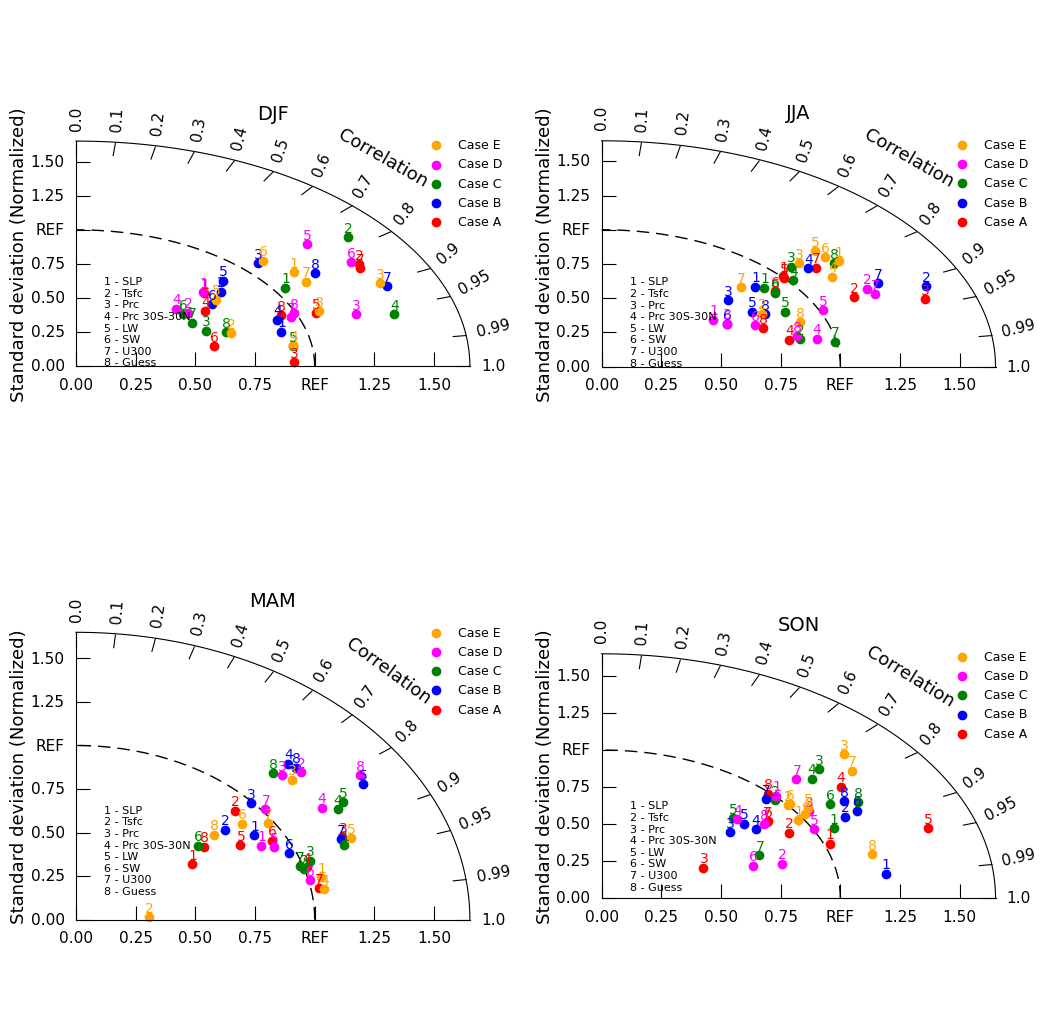

In [2]:
# Create figure
fig = plt.figure(figsize=(12, 12))
fig.subplots_adjust(wspace=0.3, hspace=0.3)

# Create a list of model names
namearr = ["SLP", "Tsfc", "Prc", "Prc 30S-30N", "LW", "SW", "U300", "Guess"]
nModel = len(namearr)

# Create a list of case names
casearr = ["Case A", "Case B", "Case C", "Case D", "Case E"]
nCase = len(casearr)

# Create lists of colors, labels, and main titles
colors = ["red", "blue", "green", "magenta", "orange"]
labels = ["Case A", "Case B", "Case C", "Case D", "Case E"]
maintitles = ["DJF", "JJA", "MAM", "SON"]

# Generate one plot for each season
for i in range(4):
    # Create dummy data for the season
    stddev = np.random.normal(1, 0.25, (nCase, nModel))
    corrcoef = np.random.uniform(0.7, 1, (nCase, nModel))

    # Create taylor diagram
    da = gv.TaylorDiagram(fig=fig, rect=221 + i, label='REF')

    # Add models case by case
    for j in range(stddev.shape[0]):
        da.add_model_set(stddev[j],
                         corrcoef[j],
                         xytext=(-4, 5),
                         fontsize=10,
                         color=colors[j],
                         label=labels[j],
                         marker='o')
    # Add legend
    da.add_legend(1.1, 1.05, fontsize=9, zorder=10)

    # Set fontsize and pad
    da.set_fontsizes_and_pad(11, 13, 2)

    # Add title
    da.add_title(maintitles[i], 14, 1.05)

    # Add model names
    da.add_model_name(namearr, x_loc=0.08, y_loc=0.4, fontsize=8)

# Show the plot
plt.show()